In [322]:
import numpy as np
import pandas as pd
import sklearn.datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sd_data = pd.read_csv(r'C:\Users\This PC\Documents\Project_Data\Spotify_Data.csv')

In [324]:
sd_data

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
1,2,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
2,3,Old Town Road - Remix,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89
3,4,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
4,5,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [325]:
sd_data.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
1,2,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
2,3,Old Town Road - Remix,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89
3,4,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
4,5,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88


In [326]:
sd_data.tail()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43
99,100,All I Wanna Do,Martin Jensen,big room,2016,112,79,73,-4,7,56,194,16,7,32


In [327]:
sd_data.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2015.910000,118.720000,67.980000,65.370000,-5.490000,17.930000,46.350000,209.170000,14.710000,8.440000,75.970000
std,29.011492,2.314186,22.389157,16.261114,11.880427,2.002498,13.822288,20.945034,24.080276,17.911846,7.820357,9.209629
min,1.000000,2010.000000,75.000000,17.000000,21.000000,-13.000000,3.000000,9.000000,157.000000,0.000000,3.000000,32.000000
25%,25.750000,2015.000000,101.500000,56.750000,58.000000,-6.000000,9.750000,29.000000,194.000000,3.750000,4.000000,71.750000
50%,50.500000,2017.000000,120.000000,68.000000,67.000000,-5.000000,13.000000,47.000000,209.000000,9.000000,6.000000,78.000000
75%,75.250000,2017.000000,134.000000,80.000000,74.000000,-4.000000,25.000000,61.000000,222.000000,19.000000,10.000000,82.000000
max,100.000000,2019.000000,186.000000,95.000000,91.000000,-2.000000,82.000000,97.000000,306.000000,84.000000,46.000000,94.000000


# Cleaning NaN Values

In [354]:
pd.isnull(sd_data).sum()

year                   0
bpm                    0
nrgy                   0
dnce                   0
dB                     0
                      ..
Artist_XXXTENTACION    0
Artist_ZAYN            0
Artist_Zara Larsson    0
Artist_Zedd            0
Artist_gnash           0
Length: 105, dtype: int64

# Exploratory Analysis

C:\Users\This PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

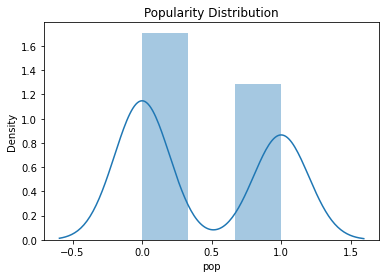

In [355]:
sns.distplot(sd_data['pop']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on year')

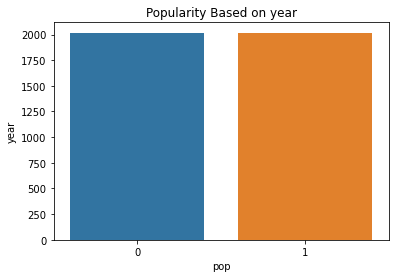

In [358]:
sns.barplot(x = 'pop', y = 'year', data = sd_data)
plt.title('Popularity Based on year')

Text(0.5, 1.0, 'Popularity Based on nrgy')

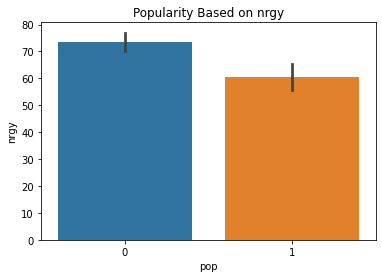

In [362]:
sns.barplot(x = 'pop', y = 'nrgy', data = sd_data)
plt.title('Popularity Based on nrgy')

Text(0.5, 1.0, 'Popularity Based on Beats per Minute')

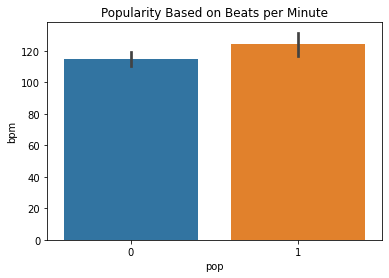

In [365]:
sns.barplot(x = 'pop', y = 'bpm', data = sd_data)
plt.title('Popularity Based on Beats per Minute')

Text(0.5, 1.0, 'Popularity Based on spch and year')

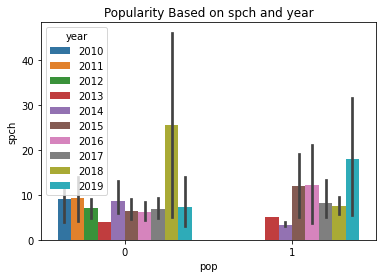

In [366]:
sns.barplot(x = 'pop', y = 'spch', hue = 'year', data = sd_data)
plt.title('Popularity Based on spch and year')

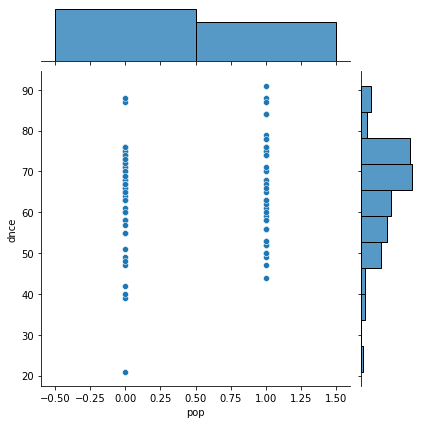

In [372]:
sns.jointplot(x = 'pop', y = 'dnce', data = sd_data)

In [ ]:
sns.pairplot(sd_data)

# Finding out the most loved genre of that time

In [328]:
sd_data[sd_data['top genre'] == 'dance pop']

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,2,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
8,9,One Kiss (with Dua Lipa),Calvin Harris,dance pop,2018,124,86,79,-3,8,59,215,4,11,85
18,19,no tears left to cry,Ariana Grande,dance pop,2018,122,71,70,-6,29,35,206,4,6,83
20,21,New Rules,Dua Lipa,dance pop,2017,116,70,76,-6,15,61,209,0,7,83
24,25,Attention,Charlie Puth,dance pop,2018,100,61,78,-5,13,80,209,11,5,82
25,26,IDGAF,Dua Lipa,dance pop,2017,97,54,84,-6,8,51,218,4,9,82
37,38,Solo (feat. Demi Lovato),Clean Bandit,dance pop,2018,105,64,74,-5,35,56,223,4,4,79
42,43,One Last Time,Ariana Grande,dance pop,2014,125,59,63,-5,10,10,197,9,3,79
44,45,Give Me Everything,Pitbull,dance pop,2011,129,94,67,-3,30,53,252,19,16,78
50,51,PILLOWTALK,ZAYN,dance pop,2016,125,70,58,-4,9,44,203,12,5,78


In [329]:
sd_data[sd_data['top genre'] == 'canadian pop']

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
3,4,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
21,22,Treat You Better,Shawn Mendes,canadian pop,2017,83,82,44,-4,11,75,188,11,34,83
26,27,There's Nothing Holdin' Me Back,Shawn Mendes,canadian pop,2017,122,81,87,-4,8,97,199,38,6,82
40,41,Mercy,Shawn Mendes,canadian pop,2017,148,66,56,-5,11,36,209,13,8,79
61,62,Friends (with BloodPopÂ®),Justin Bieber,canadian pop,2017,105,73,74,-5,30,62,189,0,4,75
74,75,As Long As You Love Me,Justin Bieber,canadian pop,2012,140,87,57,-3,36,61,229,8,10,72


In [330]:
sd_data[sd_data['top genre'] == 'dfw rap']

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
4,5,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88
6,7,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,2019,90,52,76,-4,7,93,158,53,6,86
10,11,I Fall Apart,Post Malone,dfw rap,2016,144,54,56,-5,20,29,223,7,4,84
14,15,Psycho (feat. Ty Dolla $ign),Post Malone,dfw rap,2018,140,56,75,-8,11,46,221,55,11,83
15,16,Congratulations,Post Malone,dfw rap,2016,123,80,63,-4,25,49,220,22,4,83


In [331]:
sd_data[sd_data['top genre'] == 'big room']

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
27,28,Scared to Be Lonely,Martin Garrix,big room,2017,138,54,58,-8,26,20,221,9,6,81
32,33,The Nights,Avicii,big room,2014,126,84,53,-5,25,65,177,2,4,80
33,34,Without You (feat. Sandro Cavazza),Avicii,big room,2017,134,86,66,-5,5,30,182,0,4,80
34,35,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,11,4,80
45,46,Waiting For Love,Avicii,big room,2015,128,74,58,-4,20,61,231,31,5,78
72,73,The Ocean (feat. Shy Martin),Mike Perry,big room,2016,90,57,63,-6,10,19,183,2,3,73
79,80,Sun Is Shining,Axwell /\ Ingrosso,big room,2017,132,76,47,-3,7,38,255,9,5,71
80,81,Solo Dance,Martin Jensen,big room,2016,115,85,75,-2,20,40,175,5,5,70
85,86,Five More Hours - Deorro x Chris Brown,Deorro,big room,2017,128,88,70,-3,82,50,212,3,22,69
99,100,All I Wanna Do,Martin Jensen,big room,2016,112,79,73,-4,7,56,194,16,7,32


In [332]:
sd_data[sd_data['top genre'] == 'electropop']

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
22,23,Something Just Like This,The Chainsmokers,electropop,2017,103,64,62,-7,16,45,247,5,3,83
68,69,Paris,The Chainsmokers,electropop,2017,100,64,65,-7,9,25,222,2,3,74
73,74,Capsize,FRENSHIP,electropop,2016,93,71,68,-6,69,36,238,4,3,72


In [333]:
sd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     100 non-null    int64 
 1   title      100 non-null    object
 2   artist     100 non-null    object
 3   top genre  100 non-null    object
 4   year       100 non-null    int64 
 5   bpm        100 non-null    int64 
 6   nrgy       100 non-null    int64 
 7   dnce       100 non-null    int64 
 8   dB         100 non-null    int64 
 9   live       100 non-null    int64 
 10  val        100 non-null    int64 
 11  dur        100 non-null    int64 
 12  acous      100 non-null    int64 
 13  spch       100 non-null    int64 
 14  pop        100 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 11.8+ KB


# Data Preprocessing

In [334]:
sd_data = sd_data.drop(['Number', 'title'], axis = 1)
sd_data

,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
1,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
2,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89
3,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
4,Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
96,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
97,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
98,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [335]:
pd.qcut(sd_data['pop'] , q=2 , labels = ['Less Popular' , 'More Popular'])

0     More Popular
1     More Popular
2     More Popular
3     More Popular
4     More Popular
          ...     
95    Less Popular
96    Less Popular
97    Less Popular
98    Less Popular
99    Less Popular
Name: pop, Length: 100, dtype: category
Categories (2, object): ['Less Popular' < 'More Popular']

In [336]:
pd.qcut(sd_data['pop'] , q=2 , labels = [0,1])

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: pop, Length: 100, dtype: category
Categories (2, int64): [0 < 1]

In [337]:
sd_data['pop'] = pd.qcut(sd_data['pop'] , q=2 , labels = [0,1])

# One-Hot Encoding

In [338]:
def onehot_encode(df , column , prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix = prefix)
    df = pd.concat([df , dummies], axis = 1)
    df = df.drop(column , axis = 1)
    return df

In [339]:
sd_data = onehot_encode(sd_data, 'top genre', 'Genre')
sd_data = onehot_encode(sd_data, 'artist', 'Artist')

In [340]:
sd_data

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,Artist_The Chainsmokers,Artist_The Script,Artist_The Weeknd,Artist_Usher,Artist_X Ambassadors,Artist_XXXTENTACION,Artist_ZAYN,Artist_Zara Larsson,Artist_Zedd,Artist_gnash
0,2019,135,43,70,-11,10,56,194,33,38,...,0,0,0,0,0,0,0,0,0,0
1,2019,140,32,78,-11,9,33,179,59,33,...,0,0,0,0,0,0,0,0,0,0
2,2019,136,62,88,-6,11,64,157,5,10,...,0,0,0,0,0,0,0,0,0,0
3,2019,117,55,76,-6,8,75,191,4,3,...,0,0,0,0,0,0,0,0,0,0
4,2018,160,52,59,-6,13,13,218,12,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011,90,80,65,-3,27,80,211,3,10,...,0,0,0,0,0,0,0,0,0,0
96,2011,120,79,76,-4,3,87,203,0,8,...,0,0,0,0,0,0,0,0,0,0
97,2011,122,89,67,-5,24,68,185,0,3,...,0,0,0,0,0,0,0,0,0,0
98,2017,102,75,76,-4,8,49,184,6,7,...,0,0,0,0,0,0,0,0,0,0


# Splitting & Scaling

In [341]:
y = sd_data.loc[:, 'pop']
X = sd_data.drop('pop', axis = 1)

In [342]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 20)

# Modeling & Training

In [ ]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()
svm_model = SVC()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
features = ["year", "bpm", "nrgy", "dnce", "dB", "live", "val", 
            "dur", "spch", "acous", "pop"]

In [345]:
log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

C:\Users\This PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC()

In [346]:
log_acc = log_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)
dec_acc = dec_model.score(X_test, y_test)
mlp_acc = mlp_model.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)

In [347]:
print("Logistic Regression Accuracy:", log_acc)
print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Decision Tree Classifier Accuracy:", dec_acc)
print("Neural Network Accuracy:", mlp_acc)
print("Support Vector Machine Accuracy:", svm_acc)

Logistic Regression Accuracy: 0.7666666666666667
K-Nearest-Neighbors Accuracy: 0.43333333333333335
Decision Tree Classifier Accuracy: 0.6666666666666666
Neural Network Accuracy: 0.7333333333333333
Support Vector Machine Accuracy: 0.6666666666666666
